<a href="https://colab.research.google.com/github/roman-mikhaylov/repo_sinergiya/blob/main/ML_5_11_Mikhaylov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MМЕТРИКИ**

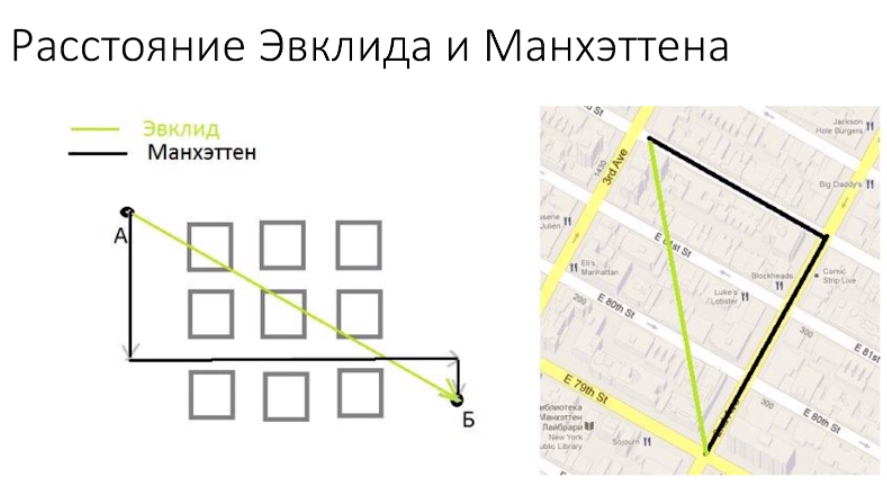

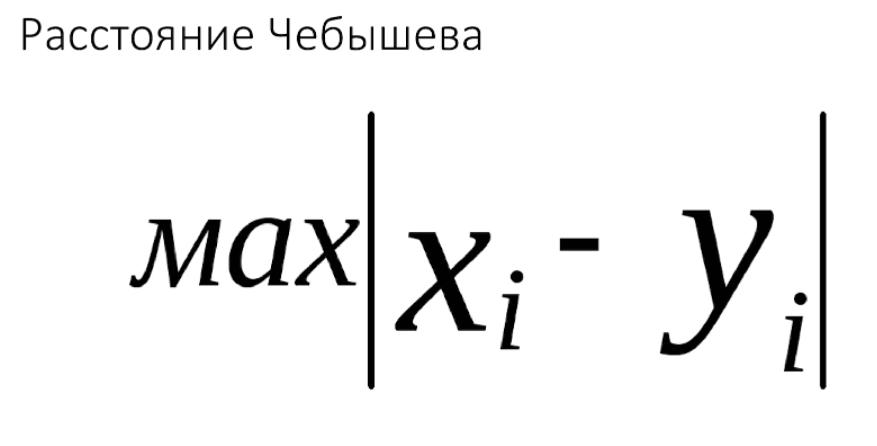

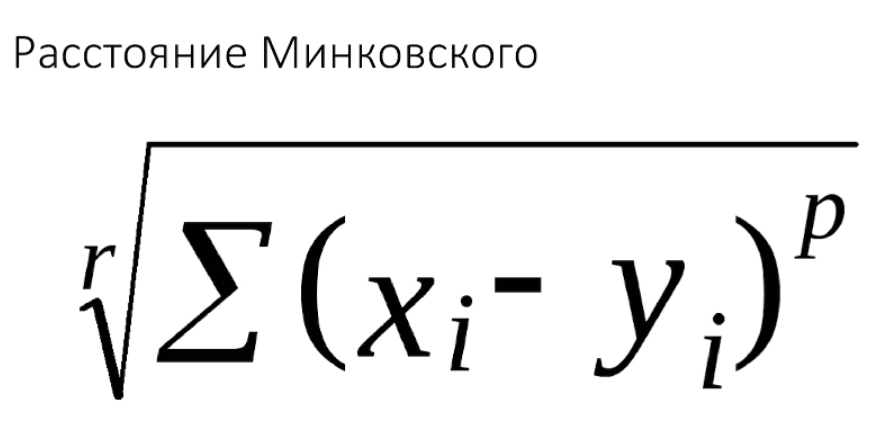

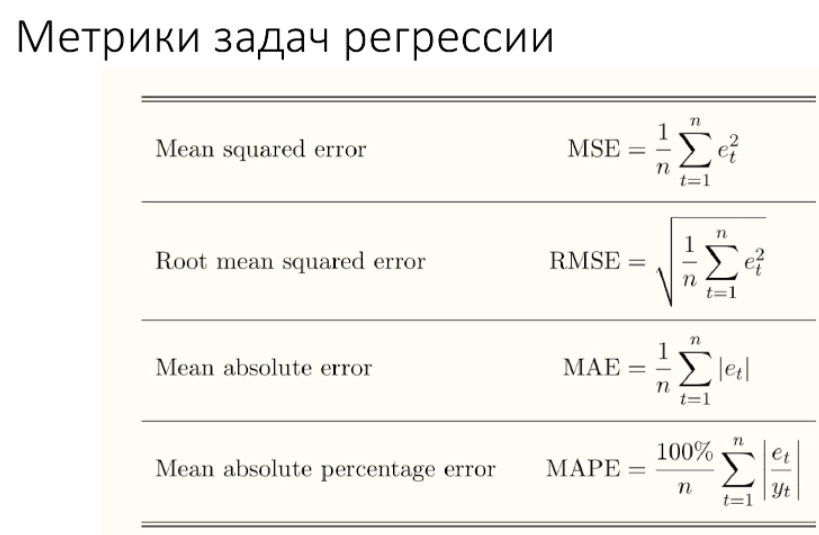

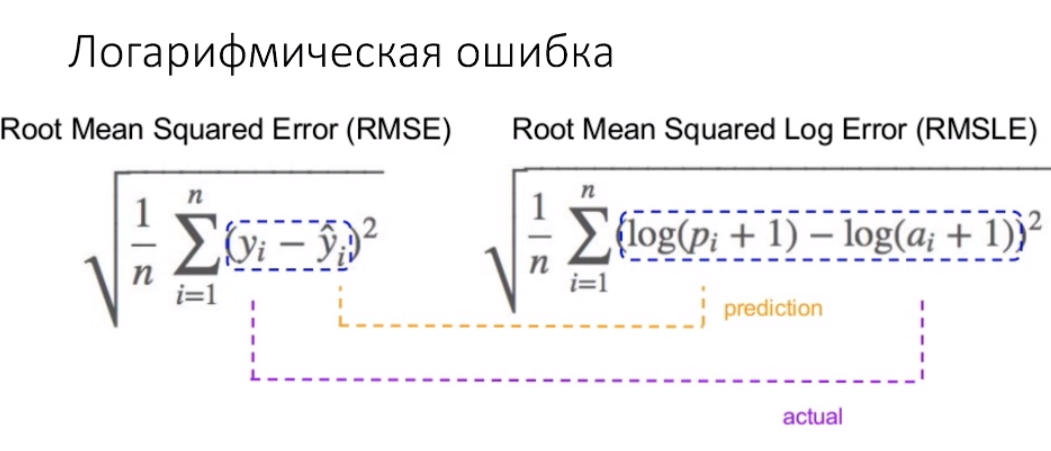

практикум

In [31]:
import numpy as np
import pandas as pd

In [32]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/energy_2.csv')

получим 24 средних значений каждого часа

In [33]:
ensamble = []
for h in range(24):
  ensamble.append(data[data['hour'] == h]['meter_reading'].mean())
print (ensamble)

[238.6837511111111, 239.21160800000004, 239.6514751111111, 240.203588, 239.263176, 238.0504221238938, 237.482464, 240.90436444444447, 242.7045384955752, 235.52270399999998, 234.97364933333333, 234.73093555555556, 235.41960311111112, 237.14267866666668, 236.49206327433626, 237.02437333333333, 237.02740444444444, 234.77961991150443, 236.67021238938054, 237.80265506607927, 237.22594336283188, 237.27428761061947, 238.32530530973452, 239.40648716814158]


MAE

абсолютная ошибка

In [34]:
err_mae = []
for h in range(24):
  err_mae.extend((data.loc[data['hour'] == h]['meter_reading']-ensamble[h]).values)
print ('MAE: {0:.4}%'. format(np.abs(err_mae).mean()))

MAE: 36.11%


MAPE

относительная ошибка

In [35]:
err_mape = []
for h in range(24):
  err_mape.extend((1- ensamble[h]/ data.loc[data['hour'] == h]['meter_reading']).values)
print ('MAPE: {0:.4}%'. format(100*np.abs(err_mape).mean()))

MAPE: 19.27%


MSE

Средняя квадратичная ошибка

In [36]:
err_mse = []
for h in range(24):
  err_mse.extend(((ensamble[h] - data.loc[data['hour'] == h]['meter_reading'])**2).values)
print ('MSE: {0:.5}'. format(np.array(err_mse).mean()))

MSE: 2409.6


RMSE

среднеквадратичное отклонение

In [37]:
err_rmse = []
for h in range(24):
  err_rmse.extend(((ensamble[h] - data.loc[data['hour'] == h]['meter_reading'])**2).values)
print ('RMSE: {0:.5}'. format(np.array(err_rmse).mean()**0.5))

RMSE: 49.088


RMSLE

среднее квадратичное логарифмическое отклонение ( или среднее квадратичное отклонение логарифма)

In [38]:
err_rmsle = []
for h in range(24):
  err_rmsle.extend(((np.log(1+ensamble[h]) - np.log(1+data.loc[data['hour'] == h]['meter_reading']))**2).values)
print ('RMSLE: {0:.5}'. format(np.array(err_rmsle).mean()**0.5))

RMSLE: 0.25287


**ЗАДАНИЕ**

1.Перечислите метрики, применяемые при регрессионном анализе.

Среднеквадратичная ошибка (MSE).

Корень из среднеквадратичной ошибки (RMSE).

Среднеквадратичная ошибка в процентах (MSPE).

Средняя абсолютная ошибка (MAE).

Средняя абсолютная ошибка в процентах (MAPE).

Cимметричная средняя абсолютная процентная ошибка (SMAPE).

Средняя абсолютная масштабированная ошибка (MASE)

Средняя относительная ошибка (MRE).

Среднеквадратичная логарифмическая ошибка (RMSLE).

Коэффициент детерминации R-квадрат.

Скорректированный коэффициент детеминации.

2.Объясните как вы понимаете расстояние Чебышева?

Расстояние Чебышева - это метрика, которая измеряет наименьшее расстояние между двумя точками на единичной сфере в пространстве со счетным количеством координат. Эта метрика была названа в честь выдающегося математика Пафнутия Львовича Чебышева (1821-1894).

Расстояние Чебышева определяется следующим образом:

Пусть x и y - две точки на единичной сфере, то есть ||x||∞ = ||y||∞ = 1. Расстояние Чебышева между этими точками равно:

d(x, y) = ||x - y||∞

где || · ||∞ обозначает максимальную абсолютную величину компонент вектора.

Таким образом, расстояние Чебышева равно наименьшему числу, которое нужно изменить в координатах одной точки, чтобы получить другую точку.
Пример, наименьшее число ходов шахматного короля при перемещении от одно точки шахматной доски до другой.
является крайним с точки зрения максимума расстояния Минковского

3.Расстояние Минковского.

Расстояние Минковского (Minkowski distance) - это обобщение понятия евклидова расстояния для случаев, когда расстояния измеряются в разных единицах или когда необходимо учитывать разные “веса” координат.

Расстояние Минковского определяется следующим образом:


d(x, y) = 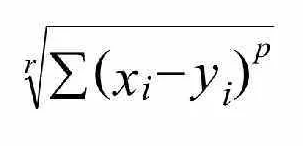

где x = (x_1, …, x_n), y = (y_1, …, y_n) ∈ R^n - две точки в n-мерном пространстве, p ≥ 1 - некоторый параметр.

При p = 1 мы получаем Manhattan distance (городское расстояние), которое часто используется для измерения расстояний на плоскости, например, на картах Google. При p = 2 мы получаем обычное евклидово расстояние.

Выбор параметра p позволяет учесть различные свойства данных и метрики. Например, при p = 1 расстояние Минковского более устойчиво к выбросам, чем евклидово расстояние (p = 2).

При p => бесконечность вырождается в расстояние Чебышева.
Иными словами, объединяет все метрики расстояний (Манхеттен, Евклидово, Чебышева)




In [39]:
#генерим набор данных
import pandas as pd
import numpy
from scipy.spatial.distance import pdist
df = pd.DataFrame(np.random.randint(1,100,size=(5, 2)), columns=['feature_1','feature_2'])
print(df)

   feature_1  feature_2
0         46         35
1         71         92
2         88         85
3          2         10
4          7         35


Евклидово расстояние — это мера расстояния между двумя точками в многомерном пространстве. Оно также известно как «прямолинейное» расстояние между двумя точками, потому что оно измеряет длину кратчайшего пути между двумя точками, предполагая, что этот путь является прямой линией. Евклидово расстояние между двумя точками в многомерном пространстве вычисляется как квадратный корень из суммы квадратов разностей между координатами двух точек. Из-за своей простоты это популярный выбор метрики расстояния, его легко понять и реализовать. Однако он предполагает, что все функции одинаково важны, и не принимает во внимание корреляцию между функциями, поэтому это не всегда может быть лучшим выбором в зависимости от проблемы, которую мы пытаемся решить.

In [40]:
#Euclidean Distance
euc_dist = pdist(df, 'euclidean')
print(euc_dist)

[ 62.24146528  65.29931087  50.60632372  39.          18.38477631
 107.16809227  85.70297544 114.10959644  95.18928511  25.49509757]


Манхэттенское расстояние, также известное как расстояние "такси" или "городской квартал", представляет собой способ измерения расстояния между двумя точками в системе, подобной сетке, например на карте улиц города. . Он рассчитывается как сумма абсолютных разностей между координатами двух точек

In [41]:
#Manhattan distance
cityblock_dist = pdist(df, 'cityblock')
print(cityblock_dist)

[ 82.  92.  69.  39.  24. 151. 121. 161. 131.  30.]


Расстояние Чебышева — это мера расстояния между двумя точками в многомерном пространстве. Он определяется как максимальная абсолютная разница между координатами двух точек в любом измерении.

In [42]:
#Chebyshev distance
cheb_dist = pdist(df, 'chebyshev')
print(cheb_dist)

[57. 50. 44. 39. 17. 82. 64. 86. 81. 25.]


Расстояние Минковского — это обобщение евклидова расстояния(p=1) , манхэттенского расстояния (p=2) и чебышева (в данном случае p=50)

In [43]:
#Minkowski distance
minkowski_dist_m = pdist(df, 'minkowski', p=1) #Manhattan distance
minkowski_dist_e = pdist(df, 'minkowski', p=2) #Euclidean Distance
minkowski_dist_ch = pdist(df, 'minkowski', p=50) #Chebyshev distance
print(minkowski_dist_e)
print("---------------------------------------------------------------")
print(minkowski_dist_m)
print("---------------------------------------------------------------")
print(minkowski_dist_ch)

[ 62.24146528  65.29931087  50.60632372  39.          18.38477631
 107.16809227  85.70297544 114.10959644  95.18928511  25.49509757]
---------------------------------------------------------------
[ 82.  92.  69.  39.  24. 151. 121. 161. 131.  30.]
---------------------------------------------------------------
[57.         50.00016366 44.         39.         17.         82.0002928
 64.00390216 86.00183418 81.         25.        ]


**Задание спикера**

1.Построить два ансамбля по часам: до 1 октября 2016 и после

In [44]:
import numpy as np
import pandas as pd

In [45]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/energy_3.csv')

In [46]:
print(data.head())

   Unnamed: 0            timestamp  meter_reading  air_temperature  \
0           0  2016-01-30 08:00:00        43.6839              8.3   
1           1  2016-01-31 05:00:00        37.5408             12.8   
2           2  2016-01-31 17:00:00        52.5571             20.6   
3           3  2016-04-08 14:00:00        59.3827             21.7   
4           4  2016-05-01 19:00:00       448.0000             31.1   

   cloud_coverage  dew_temperature  precip_depth_1_hr  sea_level_pressure  \
0             0.0              6.1                0.0              1019.0   
1             0.0             10.0                0.0              1021.9   
2             0.0             11.7                0.0              1020.9   
3             2.0             14.4                0.0              1015.1   
4             0.0             17.2                0.0              1016.1   

   wind_speed  air_temperature1  wind_direction_sin  wind_direction_cos  hour  \
0         2.1              -2.3    

In [47]:
from datetime import datetime as dt

In [48]:
# добавим столбец date


data['date'] = pd.to_datetime(data['timestamp']).dt.strftime('%Y-%m-%d')
#data['data'] = data['timestamp'].dt.strptime('timestamp','%Y-%m-%d %H:%M:%S' )
print(data.head())

   Unnamed: 0            timestamp  meter_reading  air_temperature  \
0           0  2016-01-30 08:00:00        43.6839              8.3   
1           1  2016-01-31 05:00:00        37.5408             12.8   
2           2  2016-01-31 17:00:00        52.5571             20.6   
3           3  2016-04-08 14:00:00        59.3827             21.7   
4           4  2016-05-01 19:00:00       448.0000             31.1   

   cloud_coverage  dew_temperature  precip_depth_1_hr  sea_level_pressure  \
0             0.0              6.1                0.0              1019.0   
1             0.0             10.0                0.0              1021.9   
2             0.0             11.7                0.0              1020.9   
3             2.0             14.4                0.0              1015.1   
4             0.0             17.2                0.0              1016.1   

   wind_speed  air_temperature1  wind_direction_sin  wind_direction_cos  hour  \
0         2.1              -2.3    

In [49]:
data.to_csv("/content/drive/MyDrive/Colab Notebooks/energy_4.csv")


разделим data на два по дате до 2016-10-01 и после

In [50]:
condition = data['date'] <= '2016-10-01'
before_df = data[condition]
past_df = data[~condition]

In [51]:
before_df.tail()

,Unnamed: 0,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,air_temperature1,wind_direction_sin,wind_direction_cos,hour,day,date
3222,3222,2016-10-01 19:00:00,239.579,30.6,0.0,21.7,0.0,1015.4,1.5,0.0,0.939693,0.342020,19,1,2016-10-01
3223,3223,2016-10-01 20:00:00,238.214,31.7,0.0,21.7,0.0,1014.8,3.1,1.1,0.984808,0.173648,20,1,2016-10-01
3224,3224,2016-10-01 21:00:00,250.500,30.6,0.0,21.7,0.0,1014.2,3.1,-1.1,0.766044,-0.642788,21,1,2016-10-01
3225,3225,2016-10-01 22:00:00,240.261,29.4,0.0,22.8,0.0,1014.2,5.1,-1.2,0.866025,-0.500000,22,1,2016-10-01
3226,3226,2016-10-01 23:00:00,255.278,27.8,0.0,21.7,0.0,1014.5,4.6,-1.6,0.866025,-0.500000,23,1,2016-10-01


In [52]:
past_df.head()

,Unnamed: 0,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_speed,air_temperature1,wind_direction_sin,wind_direction_cos,hour,day,date
3227,3227,2016-10-02 00:00:00,245.039,27.8,6.0,21.1,0.0,1016.0,4.1,0.0,9.848078e-01,-0.173648,0,2,2016-10-02
3228,3228,2016-10-02 01:00:00,255.278,24.4,0.0,20.0,0.0,1016.6,3.1,-3.4,-5.000000e-01,0.866025,1,2,2016-10-02
3229,3229,2016-10-02 02:00:00,252.547,23.9,0.0,21.1,0.0,1016.6,1.5,-0.5,-2.449294e-16,1.000000,2,2,2016-10-02
3230,3230,2016-10-02 03:00:00,252.547,23.9,0.0,20.6,0.0,1016.9,0.0,0.0,0.000000e+00,1.000000,3,2,2016-10-02
3231,3231,2016-10-02 04:00:00,258.690,23.9,0.0,21.1,0.0,1016.6,3.1,0.0,9.848078e-01,-0.173648,4,2,2016-10-02


In [53]:
# анасамбль средних значений meter_reading по часу до 2016-10-01
ensamble_1 = []
for h in range(24):
  ensamble_1.append(before_df[data['hour'] == h]['meter_reading'].mean())
print (ensamble_1)

[258.99596268656717, 260.249052238806, 261.145552238806, 260.62599253731344, 259.50026865671646, 257.20383555555554, 256.55099253731345, 261.0334925373134, 264.47947333333326, 257.28448432835825, 260.5953805970149, 261.73634552238804, 263.35620373134327, 266.50412686567165, 265.01541259259255, 266.0202238805971, 264.9862089552239, 259.90380074074073, 258.93302222222223, 258.0748161764706, 256.6679481481482, 257.78533333333337, 259.0493111111111, 260.11105185185187]


<ipython-input-53-7b5ba1a6bd99>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ensamble_1.append(before_df[data['hour'] == h]['meter_reading'].mean())


In [54]:
# анасамбль средних значений meter_reading по часу после 2016-10-01
ensamble_2 = []
for h in range(24):
  ensamble_2.append(past_df[data['hour'] == h]['meter_reading'].mean())
print (ensamble_2)

[208.77346153846156, 208.2333934065934, 208.00085604395602, 210.1310362637363, 209.46350109890105, 209.6360175824176, 209.4035318681319, 211.2636703296703, 210.4010637362637, 203.47788461538465, 197.2449461538461, 194.96472747252747, 194.28219120879123, 193.90713956043956, 194.17720439560438, 194.32718681318676, 195.8572967032967, 197.50748351648352, 203.64296703296705, 207.5057989010989, 208.38340879120878, 206.84581318681316, 207.5809010989011, 208.69092417582422]


<ipython-input-54-ae1dcafb7380>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ensamble_2.append(past_df[data['hour'] == h]['meter_reading'].mean())


2.Вычислить RMSLE для двух ансамблей

RMSLE для ансамбля до 1.10.2016

In [55]:
err_rmsle_1 = []
for h in range(24):
  err_rmsle_1.extend(((np.log(1+ensamble_1[h]) - np.log(1+before_df.loc[before_df['hour'] == h]['meter_reading']))**2).values)
print ('RMSLE_1: {0:.5}'. format(np.array(err_rmsle_1).mean()**0.5))

RMSLE_1: 0.16167


RMSLE для ансамбля после 1.10.2016

In [56]:
err_rmsle_2 = []
for h in range(24):
  err_rmsle_2.extend(((np.log(1+ensamble_2[h]) - np.log(1+past_df.loc[past_df['hour'] == h]['meter_reading']))**2).values)
print ('RMSLE_2: {0:.5}'. format(np.array(err_rmsle_2).mean()**0.5))

RMSLE_2: 0.27647


выводы: Если RMSLE одной модели меньше, чем у другой, это означает, что первая модель имеет меньшую среднюю квадратичную относительную ошибку логарифма и, следовательно, обеспечивает более точный прогноз, чем вторая модель. Это говорит о том, что первая модель лучше подходит для данных, чем вторая.